In [ ]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# Step 2: Load Dataset
car_df = pd.read_csv('car data.csv')

In [ ]:
# Step 3: Display basic info
print("First 5 rows:")
print(car_df.head())

print("\nDataset Info:")
print(car_df.info())

First 5 rows:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    

In [ ]:
# Step 4: Check missing values
print("\nMissing values:")
print(car_df.isnull().sum())


Missing values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


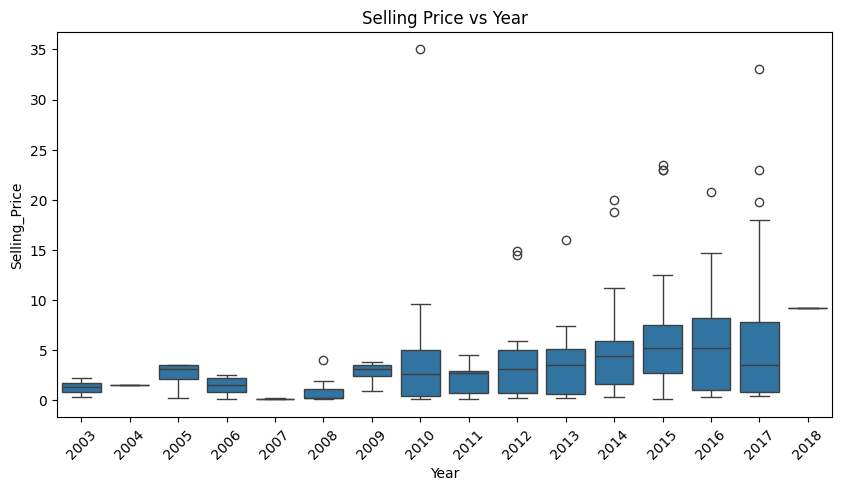

In [ ]:
# Step 5: Visual 1 – Year vs Selling Price
plt.figure(figsize=(10,5))
sns.boxplot(x='Year', y='Selling_Price', data=car_df)
plt.title("Selling Price vs Year")
plt.xticks(rotation=45)
plt.show()

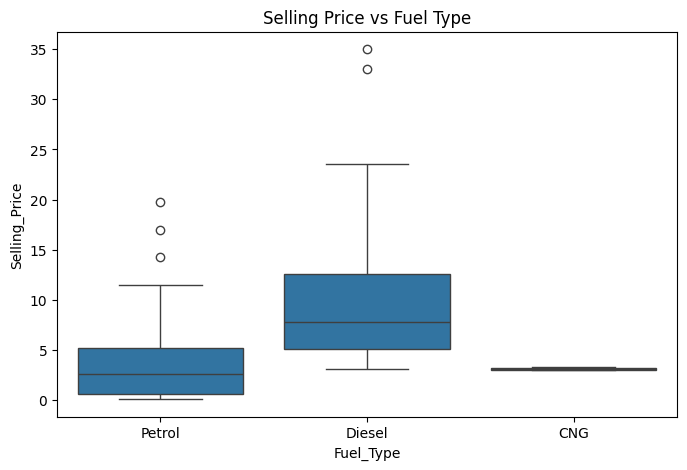

In [ ]:
# Step 6: Visual 2 – Fuel Type vs Selling Price
plt.figure(figsize=(8,5))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_df)
plt.title("Selling Price vs Fuel Type")
plt.show()

In [ ]:
# Step 7: Encode Categorical Features
df = car_df.copy()
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

In [ ]:
# Step 8: Prepare Features and Target
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [ ]:
# Step 9: Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 10: Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Step 11: Predict
y_pred = model.predict(X_test)

In [ ]:
# Step 1: Copy the original DataFrame to preserve Car_Name
df = car_df.copy()

# Step 2: Label Encode categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

# Step 3: Define Features and Target
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']
car_names = df['Car_Name']  # store names

# Step 4: Train-Test Split with Car Name index retained
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, name_train, name_test = train_test_split(
    X, y, car_names, test_size=0.2, random_state=42)

# Step 5: Train Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict
y_pred = model.predict(X_test)

# Step 7: Combine Car Name and Predicted Price
result_df = pd.DataFrame({
    'Car Name': name_test.values,
    'Predicted Price': y_pred
})

# Reset index and show top results
result_df.reset_index(drop=True, inplace=True)
print("Car Name and Predicted Selling Price:")
print(result_df.head(10))

Car Name and Predicted Selling Price:
                    Car Name  Predicted Price
0           Honda Activa 125           0.4403
1                       city          11.0518
2                      verna           4.8970
3         Bajaj Discover 125           0.2091
4              corolla altis           7.6840
5                       ciaz           6.2695
6  Royal Enfield Classic 350           1.0999
7              Yamaha Fazer            0.5847
8       Hero Splender iSmart           0.4653
9                     ertiga           6.8840


In [ ]:
# Step 12: Evaluation
print("\nModel Evaluation:")
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


Model Evaluation:
R2 Score: 0.9630473458807466
Mean Absolute Error: 0.6171081967213115


In [ ]:
# Step 13: Compare Actual vs Predicted
compare_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred})
print("\nComparison (first 10 rows):")
print(compare_df.head(10))


Comparison (first 10 rows):
   Actual Price  Predicted Price
0          0.35           0.4403
1         10.11          11.0518
2          4.95           4.8970
3          0.15           0.2091
4          6.95           7.6840
5          7.45           6.2695
6          1.10           1.0999
7          0.50           0.5847
8          0.45           0.4653
9          6.00           6.8840


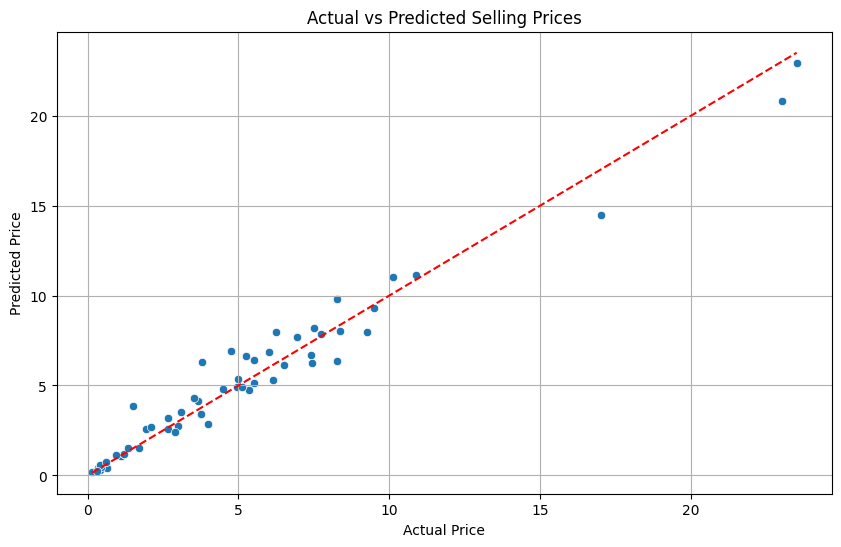

In [ ]:
# Optional: Plot Actual vs Predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal
plt.title("Actual vs Predicted Selling Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()